In [1]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import acquire
import requests

### Stores data

In [2]:
df = pd.read_csv('total_sales_data.csv')
df.head()

,item,sale_amount,sale_date,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013


Using your store items data:

Convert date column to datetime format.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item           913000 non-null  int64  
 1   sale_amount    913000 non-null  float64
 2   sale_date      913000 non-null  object 
 3   sale_id        913000 non-null  int64  
 4   store          913000 non-null  int64  
 5   store_address  913000 non-null  object 
 6   store_city     913000 non-null  object 
 7   store_id       913000 non-null  int64  
 8   store_state    913000 non-null  object 
 9   store_zipcode  913000 non-null  int64  
 10  item_brand     913000 non-null  object 
 11  item_id        913000 non-null  int64  
 12  item_name      913000 non-null  object 
 13  item_price     913000 non-null  float64
 14  item_upc12     913000 non-null  int64  
 15  item_upc14     913000 non-null  int64  
dtypes: float64(2), int64(8), object(6)
memory usage: 111.5+ MB


In [4]:
df['sale_date'] = pd.to_datetime(df['sale_date'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   item           913000 non-null  int64              
 1   sale_amount    913000 non-null  float64            
 2   sale_date      913000 non-null  datetime64[ns, UTC]
 3   sale_id        913000 non-null  int64              
 4   store          913000 non-null  int64              
 5   store_address  913000 non-null  object             
 6   store_city     913000 non-null  object             
 7   store_id       913000 non-null  int64              
 8   store_state    913000 non-null  object             
 9   store_zipcode  913000 non-null  int64              
 10  item_brand     913000 non-null  object             
 11  item_id        913000 non-null  int64              
 12  item_name      913000 non-null  object             
 13  item_price     913000 non-nul

Set the index to be the datetime variable.

In [6]:
df = df.set_index('sale_date')
df.head()

,item,sale_amount,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
sale_date,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-02 00:00:00+00:00,1,11.0,2,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-03 00:00:00+00:00,1,14.0,3,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-04 00:00:00+00:00,1,13.0,4,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-05 00:00:00+00:00,1,10.0,5,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013


Plot the distribution of sale_amount and item_price.

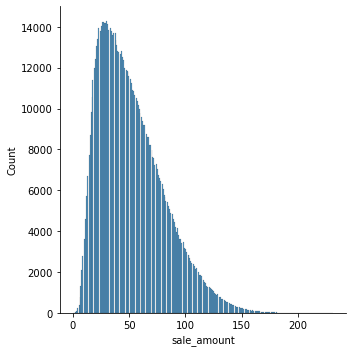

In [7]:
sns.displot(df.sale_amount)

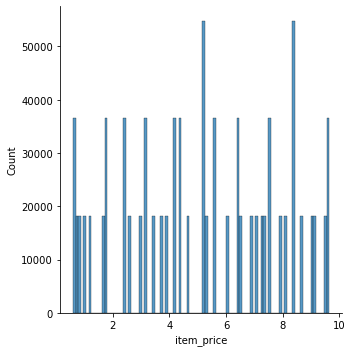

In [8]:
sns.displot(df.item_price)

Add a 'month' and 'day of week' column to your dataframe.

In [9]:
df['month'] = df.index.strftime('%m-%b')
df.head(1)

,item,sale_amount,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,01-Jan


In [10]:
df['day'] = df.index.strftime('%w-%a')
df.head(1)

,item,sale_amount,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,day
sale_date,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,01-Jan,2-Tue


Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [11]:
df['sales_total'] = df.sale_amount * df.item_price
df.head(1)

,item,sale_amount,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,day,sales_total
sale_date,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,01-Jan,2-Tue,10.92


Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [12]:
def prepare_sales_data(df):
    df['sale_date'] = pd.to_datetime(df['sale_date'])
    df = df.set_index('sale_date')
    df['month'] = df.index.strftime('%m-%b')
    df['day'] = df.index.strftime('%w-%a')
    df['sales_total'] = df.sale_amount * df.item_price
    return df


### OPS data 

In [13]:
opsd = acquire.get_opsd_data()
opsd.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


Convert date column to datetime format.

In [14]:
opsd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [15]:
opsd['Date'] = pd.to_datetime(opsd['Date'])

Set the index to be the datetime variable.

In [16]:
opsd = opsd.set_index('Date')

In [17]:
opsd.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


Plot the distribution of each of your variables.

<AxesSubplot:>

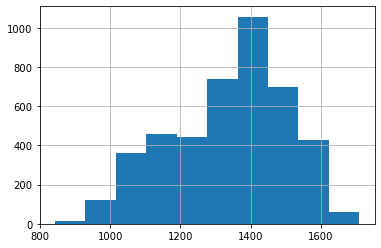

In [19]:
opsd.Consumption.hist()

<AxesSubplot:>

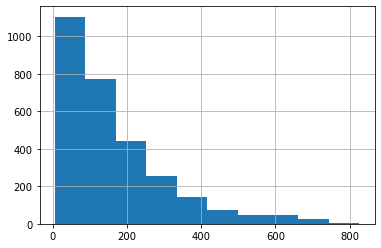

In [20]:
opsd.Wind.hist()

<AxesSubplot:>

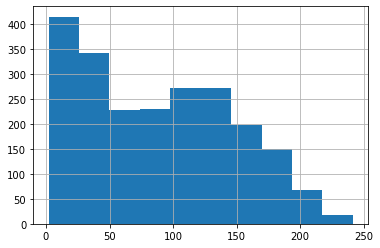

In [21]:
opsd.Solar.hist()

<AxesSubplot:>

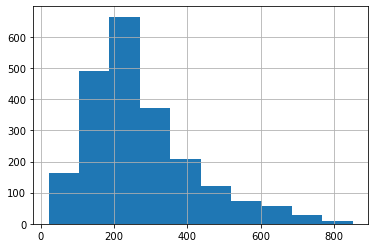

In [22]:
opsd['Wind+Solar'].hist()

Add a month and a year column to your dataframe.

In [23]:
opsd['month'] = opsd.index.strftime('%m-%b')

In [24]:
opsd['year'] = opsd.index.year
opsd.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,01-Jan,2006
2006-01-02,1380.521,NaN,NaN,NaN,01-Jan,2006
2006-01-03,1442.533,NaN,NaN,NaN,01-Jan,2006
2006-01-04,1457.217,NaN,NaN,NaN,01-Jan,2006
2006-01-05,1477.131,NaN,NaN,NaN,01-Jan,2006


In [26]:
opsd.isna().sum()

Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
month             0
year              0
dtype: int64

In [28]:
opsd.shape

(4383, 6)

In [29]:
opsd.fillna(0)

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.18400,0.000,0.000,0.000,01-Jan,2006
2006-01-02,1380.52100,0.000,0.000,0.000,01-Jan,2006
2006-01-03,1442.53300,0.000,0.000,0.000,01-Jan,2006
2006-01-04,1457.21700,0.000,0.000,0.000,01-Jan,2006
2006-01-05,1477.13100,0.000,0.000,0.000,01-Jan,2006
...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,12-Dec,2017
2017-12-28,1299.86398,506.424,14.162,520.586,12-Dec,2017
2017-12-29,1295.08753,584.277,29.854,614.131,12-Dec,2017


In [30]:
def prepare_opsd_data(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index('Date')
    df['month'] = df.index.strftime('%m-%b')
    df['year'] = df.index.year
    df = df.fillna(0)
    return df